In [1]:
import sys
sys.path.append('/Users/nneveu/github/xta/xta') # path to xta
import os, sys
#from xta import xta_sim

In [14]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
#plt.style.use('petrstyle.txt')
from matplotlib.ticker import NullFormatter
import glob, h5py
import shutil
import scipy.io
import pandas as pd
import pydicom as dicom
#import cv2

#from astra import Astra#, template_dir
#from astra.plot import plot_fieldmaps, plot_stats, plot_stats_with_layout
import distgen
from distgen import Generator
from distgen.writers import *
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

#slice plots
# from h5py import File
# from pmd_beamphysics.interfaces import opal
# from pmd_beamphysics.plot import slice_plot
# from pmd_beamphysics.plot import marginal_plot, density_plot

# Generating electron distribution with tumor image

In [15]:
#tumor1='/Users/felicity/Downloads/field1/field1.jpg'
tumor1 = '/Users/nneveu/Google Drive/My Drive/students/Summer_2024/Felicity/field1.jpg'

## Electron Distribution Generation

In [16]:
def generate_dist(dist_file):

    # dist_file = '/Users/felicity/downloads/field1/field1.dcm'
    dist = Generator(dist_file, verbose=False)
    
    dist.input['xy_dist']['file'] = tumor1 #dcm_crop(dcm_path)
    dist.input['n_particle'] = int(1e4)
    dist.input['start']['MTE']['value'] = 130 #330
    
    
    fwhm = 0.06/2.355 # 60 fs = 0.06 ps
    dist.input['t_dist']['sigma_t']['value'] = fwhm
    
    dist.input['total_charge']['value'] = 1
    
        # dist.input['r_dist']['max_r']['value'] = 0.5
        
    dist.run()
    particles = dist.particles 
    #particles.write_astra('xta/astra-inputs/astra_particles.txt')
    #particles.write_astra('xta/astra-inputs/field1.jpg')
    
    return particles, dist

In [17]:
dist_file = '/Users/nneveu/github/xta/xta/astra-inputs/distgen.yaml'

In [18]:
particles, dist = generate_dist(dist_file)

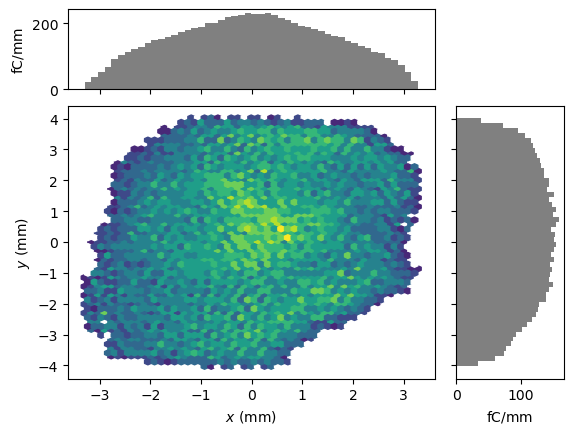

In [19]:
particles.plot('x', 'y')

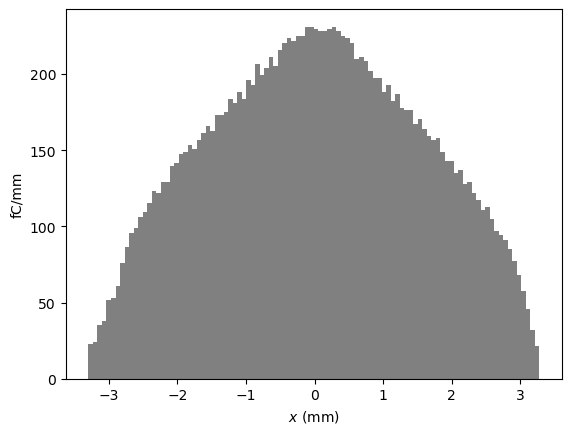

In [8]:
particles.plot('x')

In [18]:
particles.x


array([-0.00209801, -0.00150033, -0.00099229, ...,  0.00278743,
       -0.00232215, -0.00167791])

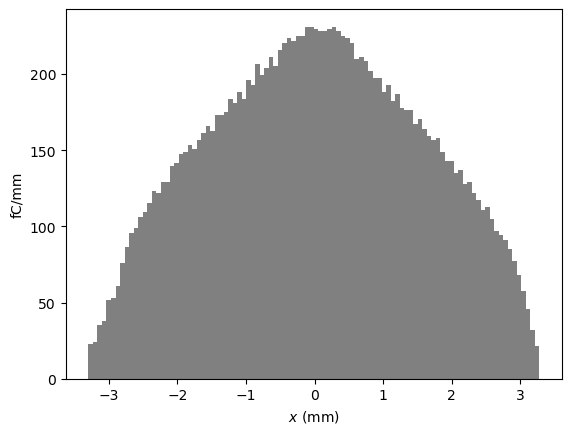

In [19]:
particles.plot()

From stackoverflow: https://stackoverflow.com/questions/26351621/turn-hist2d-output-into-contours-in-matplotlib 

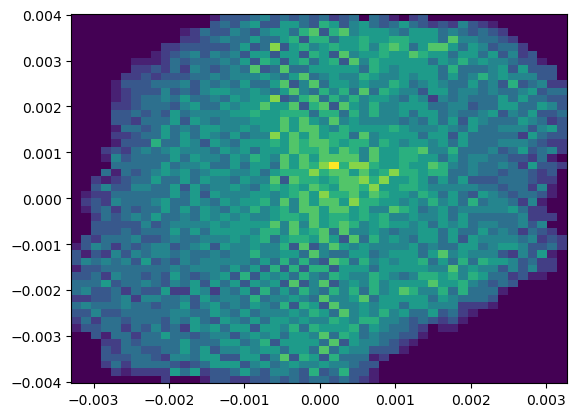

In [26]:
counts,ybins,xbins,image = hist2d(particles.x,particles.y,bins=50)

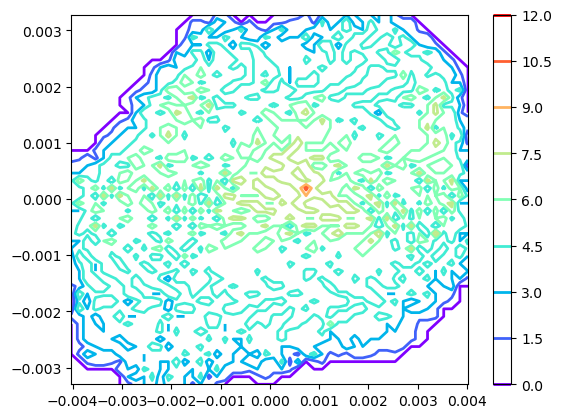

In [36]:
#mylevels = [1, 2, 20]
contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2, cmap = plt.cm.rainbow)
plt.colorbar()

TODO: 
- change color map / consider filling in color map
- add color bar (levels)
- convert color bar to dose rate
- add buffer space to plot
- add axis labels 